# **Identificação de variedades do grão de trigo**

> Os  grãos de trigo pertencentem a três variedades diferentes de trigo: Kama, Rosa e Canadense. A visualização de alta qualidade da estrutura interna do kernel foi detectada utilizando-se uma técnica de raio-X macia.

> <img src="https://raw.githubusercontent.com/MonizGarcia5/Data_Science/main/IdentificarVariedadeTrigo/imgTrigo.jpg" />

> Estudos foram realizados utilizando-se grãos de trigo colhidos originários de campos 
experimentais, explorados no Instituto de Agrofísica da Academia Polonesa de Ciências em Lublin.
Para construir os dados, foram medidos sete parâmetros geométricos de grãos de trigo.

##  Informações dos atributos

1) área A

2) perímetro P

3) compactação C 

4) comprimento do kernel

5) largura do kernel

6) coeficiente de assimetria

7) comprimento do sulco do kernel

Fonte dos dados: http://archive.ics.uci.edu/ml/datasets/seeds#

## Indice
1) Pacotes utilizados

2)  Pre-processamento, Exploracao e analise de dados

3) Avaliando o modelo

4) Conclusão

## 1) Pacotes utilizados

In [1]:
# carregar e tratar o conjunto de dados
import pandas as pd
# Biblioteca para plotagem de relatorio
import matplotlib.pyplot as plt
# Exploração e análise de dados
import seaborn as sns
# Biblioteca do algoritmo Kmeans
from sklearn.cluster import KMeans
# pre- processamento de dados
from sklearn.preprocessing import LabelEncoder
# carregar e tratar o conjunto de dados
import numpy as np
# Tratamento de warnings
#import warnings
#warnings.filterwarnings('ignore')

## **2) Exploração e análise dos dados**

In [2]:
df_trigo = pd.read_csv('C:/Portfolio/Agrupamento/DataSet/seeds_dataset.txt')

In [3]:
df_trigo.head()

,areaA,perimeterP,compactnessC,lengthK,widthK,asymmetryC,lengthG,typeG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
# Separa os dados de treino e de classe
classes = df_trigo['typeG']
df_trigo.drop('typeG', axis=1, inplace=True)

In [5]:
## Transforma os dados de treino em valores inteiros 
enc = LabelEncoder()

inteiros = enc.fit_transform(df_trigo['areaA'])
df_trigo['areaA_int'] = inteiros

inteiros = enc.fit_transform(df_trigo['perimeterP'])
df_trigo['perimeterP_int'] = inteiros

inteiros = enc.fit_transform(df_trigo['compactnessC'])
df_trigo['compactnessC_int'] = inteiros

inteiros = enc.fit_transform(df_trigo['lengthK'])
df_trigo['lengthK_int'] = inteiros

inteiros = enc.fit_transform(df_trigo['widthK'])
df_trigo['widthK_int'] = inteiros

inteiros = enc.fit_transform(df_trigo['asymmetryC'])
df_trigo['asymmetryC_int'] = inteiros

inteiros = enc.fit_transform(df_trigo['lengthG'])
df_trigo['lengthG_int'] = inteiros

df_trigo.drop(['areaA','perimeterP','compactnessC','lengthK','widthK','asymmetryC','lengthG'], axis=1, inplace=True)

treino=df_trigo

In [6]:
kmeans = KMeans(n_clusters = 3,n_init=30,max_iter=400,algorithm="elkan")

In [7]:
kmeans.fit(treino)

KMeans(algorithm='elkan', max_iter=400, n_clusters=3, n_init=30)

In [8]:
# Centroides
kmeans.cluster_centers_

array([[158.22222222, 137.06944444, 123.48611111, 152.43055556,
        148.02777778, 101.61111111, 115.80555556],
       [ 33.31884058,  30.94202899,  43.44927536,  40.65217391,
         32.23188406, 149.14492754,  43.79710145],
       [ 90.86956522,  75.62318841, 113.95652174,  78.2173913 ,
         87.08695652,  55.5942029 ,  40.4057971 ]])

### Visualizando valores de distância para cada cluster

In [22]:
# Tabela de distancia 
distance = kmeans.fit_transform(treino)
distance[0]


array([125.65483645, 191.48699285,  65.90117862])

<IPython.core.display.Javascript object>


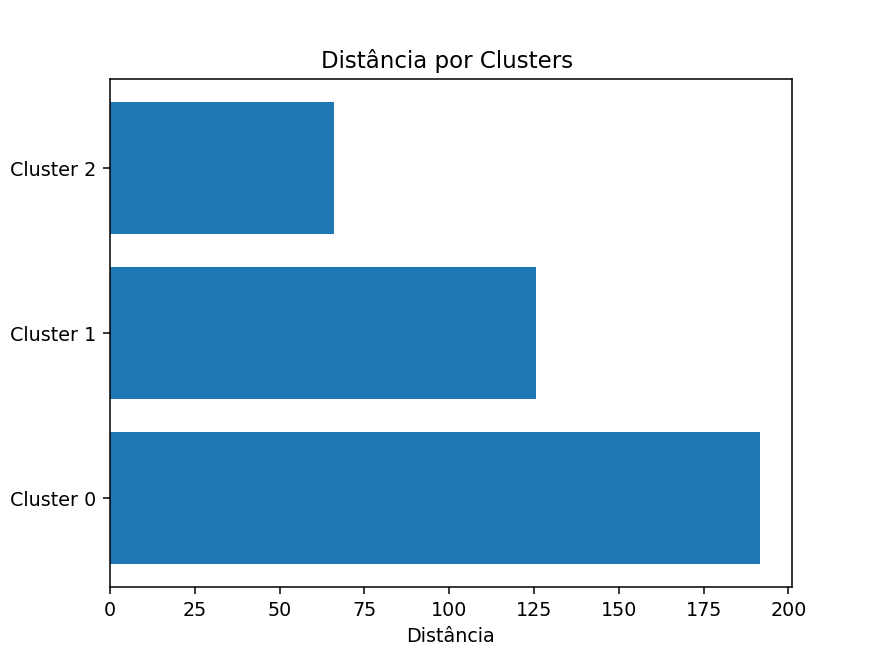

In [21]:
%matplotlib notebook
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

<IPython.core.display.Javascript object>


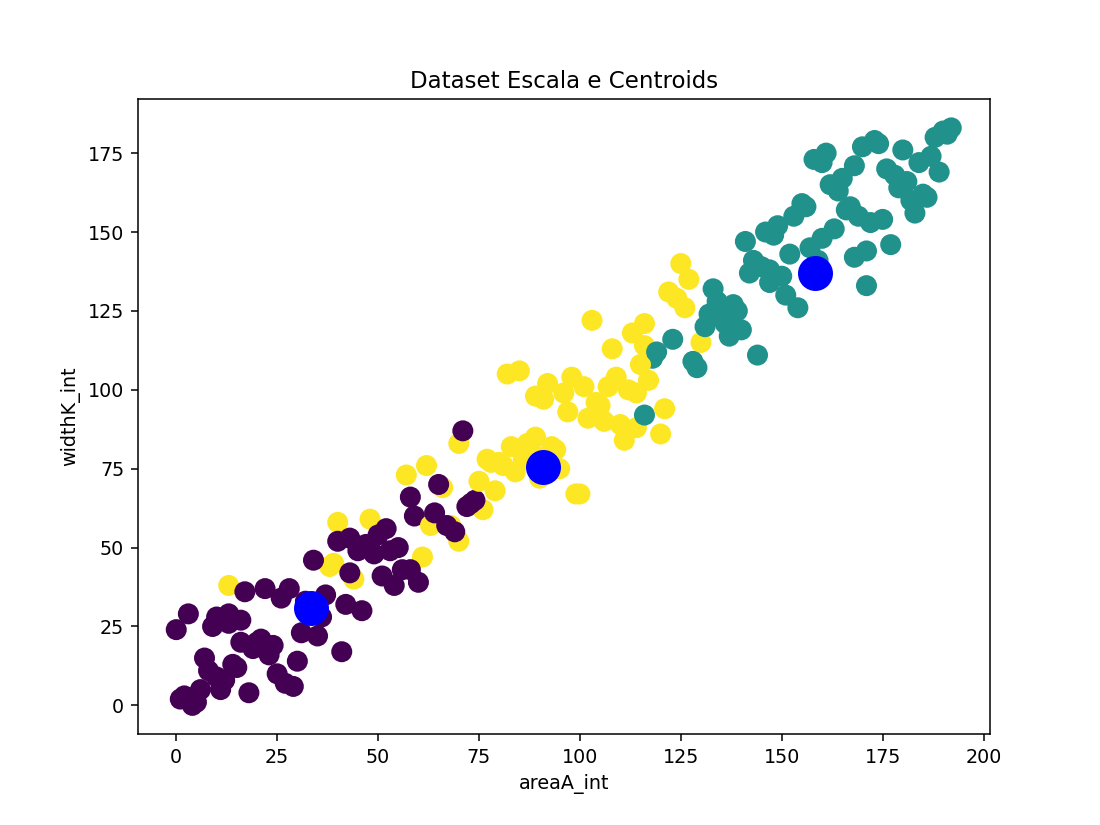

In [19]:
# Visualizando os centroides
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(treino['areaA_int'], treino['widthK_int'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue',label = 'Centroids')
plt.title('Dataset Escala e Centroids')
plt.xlabel('areaA_int')
plt.ylabel('widthK_int')
plt.show()

In [11]:
#  Imprimindo Rótulos ( grupos previsto )
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# prevendo para novos grupos 
data = [
        [112,98,87,118,96,35,58],
        [32,28,39,28,30,100,30],
        [125,104,171,102,133,5,50]
    ]
kmeans.predict(data)

array([2, 0, 2])

<IPython.core.display.Javascript object>


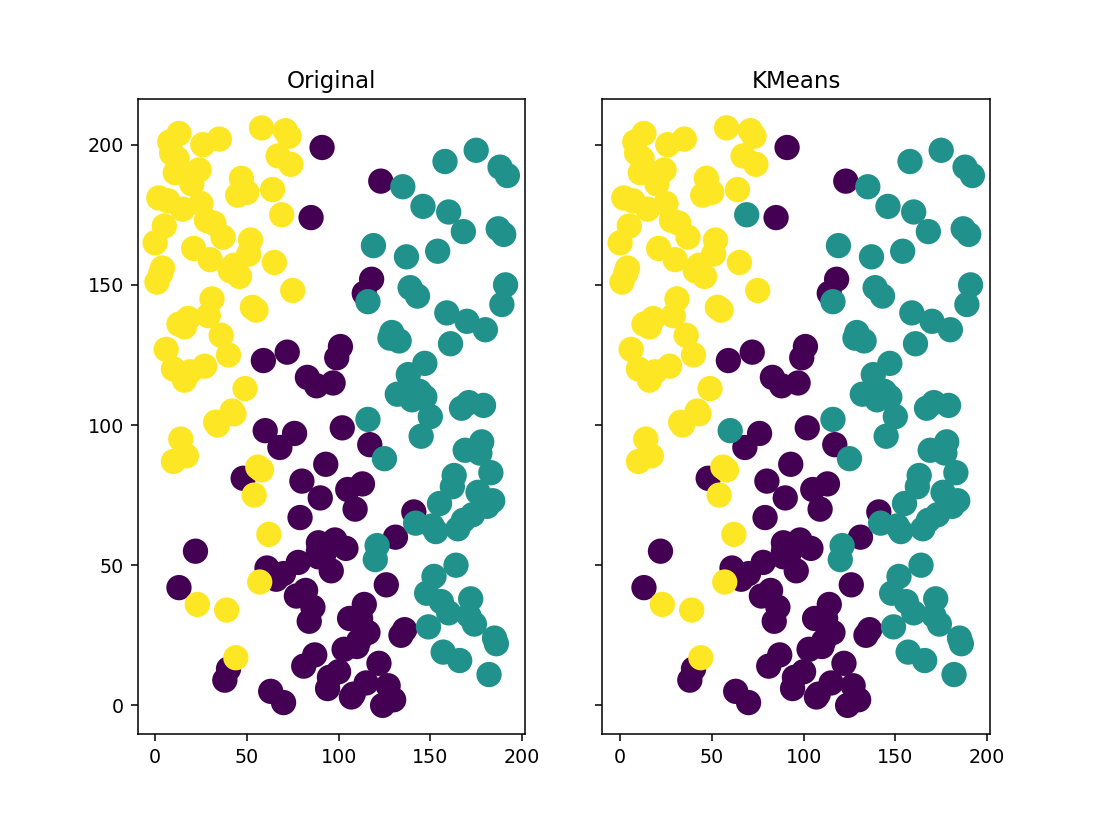

In [18]:
# Comparando Agrupamentos Originais com os Previstos
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(treino['areaA_int'], treino['asymmetryC_int'],s=150,c=sorted(classes))
ax2.set_title('KMeans')
ax2.scatter(treino['areaA_int'], treino['asymmetryC_int'],s=150,c=sorted(kmeans.labels_))

## 3) Avaliando o Modelo

Avaliando a precisão da previsão do algoritmo de agrupamento K-Means.

1 4009687.4666666654
2 1926355.409937323
3 1300233.9390096618
4 1127509.4645533827
5 983416.0644675863
6 861788.6635814093
7 772229.9813706507
8 716490.2420653612
9 642882.8079647803
10 602891.7012160354


<IPython.core.display.Javascript object>


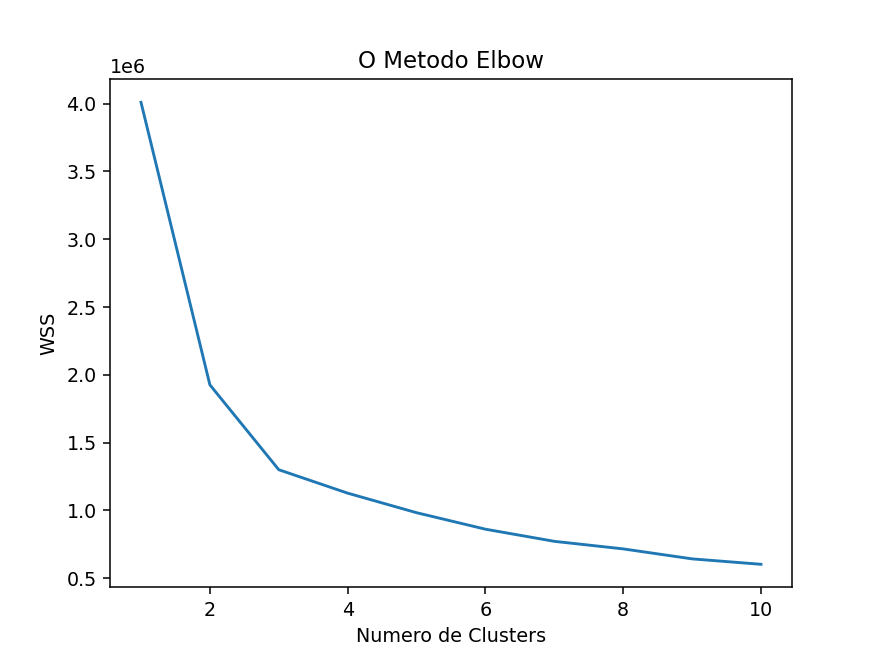

In [14]:
# Estimando o valor do parametro K - Método Elbow
%matplotlib notebook
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(treino)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [15]:
# Matriz de Confusão
print (pd.crosstab(classes,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0         4   6  60   70
1         0  66   4   70
2        65   0   5   70
All      69  72  69  210


In [16]:
kmeans.cluster_centers_

array([[ 33.31884058,  30.94202899,  43.44927536,  40.65217391,
         32.23188406, 149.14492754,  43.79710145],
       [158.22222222, 137.06944444, 123.48611111, 152.43055556,
        148.02777778, 101.61111111, 115.80555556],
       [ 90.86956522,  75.62318841, 113.95652174,  78.2173913 ,
         87.08695652,  55.5942029 ,  40.4057971 ]])

In [17]:
# Metricas de classificação
from sklearn import metrics
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(classes,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.06      0.06      0.06        70
   Cluster 1       0.92      0.94      0.93        70
   Cluster 0       0.07      0.07      0.07        70

    accuracy                           0.36       210
   macro avg       0.35      0.36      0.35       210
weighted avg       0.35      0.36      0.35       210



## 4) **Conclusão**

1) O algoritmo K-Means obteve uma otima acurácia ,0.91, para o problema proposto.

2) Utilizando o método do cotovelo foi estimado o melhor valor do parametro K igual a 3.
